In [1]:
import pandas as pd
import numpy as np
import scipy

In [8]:
import os
os.listdir()

['.ipynb_checkpoints', 'KL-divergence-test.ipynb']

In [10]:
real = pd.read_csv('data/fake_test_sample.csv')
fake = pd.read_csv('data/real_test_sample.csv')

In [11]:
real

,trans_id,account_id,trans_amount,balance_after_trans,trans_type,trans_operation,trans_k_symbol,trans_date
0,911598,3001,13619.0,92079.0,CREDIT,COLLECTION_FROM_OTHER_BANK,UNKNOWN,1885
1,377371,1042,4174.0,32470.0,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,HOUSEHOLD,1483
2,970113,3225,274.0,57608.0,WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,1855
3,450090,1489,301.0,36258.0,CREDIT,CREDIT_IN_CASH,UNKNOWN,885
4,1120409,3634,6303.0,50975.0,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,HOUSEHOLD,1211
...,...,...,...,...,...,...,...,...
995,1148391,3740,354.0,43688.0,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,HOUSEHOLD,1001
996,3605655,4099,78.0,23258.0,CREDIT,UNKNOWN,INTEREST_CREDITED,692
997,1058574,3512,1.0,13975.0,WITHDRAWAL,WITHDRAWAL_IN_CASH,PAYMENT_FOR_STATEMENT,794
998,1264018,4317,-18.0,64244.0,WITHDRAWAL,WITHDRAWAL_IN_CASH,PAYMENT_FOR_STATEMENT,2065


In [18]:
from scipy import stats

In [30]:
stats.entropy([0.1, 0.3, 0.2], [0.2, 0.1, 0.3])

0.29862657820467575

In [24]:
real.describe(include='all')

,trans_id,account_id,trans_amount,balance_after_trans,trans_type,trans_operation,trans_k_symbol,trans_date
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000
unique,NaN,NaN,NaN,NaN,3,6,8,NaN
top,NaN,NaN,NaN,NaN,WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,NaN
freq,NaN,NaN,NaN,NaN,574,397,460,NaN
mean,1.389648e+06,2739.289000,4110.665000,37850.953000,NaN,NaN,NaN,1421.764000
std,1.264652e+06,2381.642554,7506.175593,21053.935848,NaN,NaN,NaN,521.285573
min,6.684100e+04,-2.000000,-752.000000,9374.000000,NaN,NaN,NaN,187.000000
25%,4.324900e+05,983.750000,51.000000,21266.500000,NaN,NaN,NaN,1129.000000
50%,8.703035e+05,2132.500000,879.000000,32747.500000,NaN,NaN,NaN,1496.000000
75%,2.317930e+06,3598.000000,4556.000000,49173.500000,NaN,NaN,NaN,1902.250000


In [34]:
from sklearn.neighbors import KernelDensity
import seaborn as sns
import matplotlib.pyplot as plt

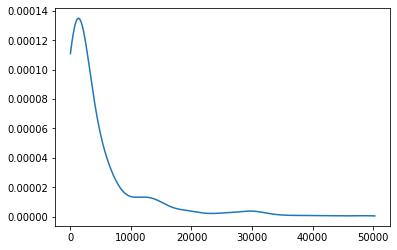

In [61]:
model = scipy.stats.gaussian_kde(real.trans_amount)
probs_real = model(np.arange(real.trans_amount.min(), real.trans_amount.max()))
plt.plot(probs_real)

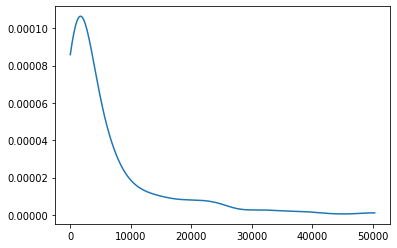

In [62]:
model = scipy.stats.gaussian_kde(fake.trans_amount)
probs_fake = model(np.arange(real.trans_amount.min(), real.trans_amount.max()))
plt.plot(probs_fake)

In [66]:
np.sum(probs_real)

0.818616925512345

In [63]:
stats.entropy(probs_real, probs_fake)

0.03791587224888453

In [64]:
stats.entropy(probs_fake, probs_real)

0.043705428486526296

## Test with qcut

In [103]:
binned_values_real, bins = pd.cut(real.trans_amount, bins=25, retbins=True)
binned_values_real

0      (13328.36, 15339.84]
1        (3270.96, 5282.44]
2       (-802.287, 1259.48]
3       (-802.287, 1259.48]
4        (5282.44, 7293.92]
               ...         
995     (-802.287, 1259.48]
996     (-802.287, 1259.48]
997     (-802.287, 1259.48]
998     (-802.287, 1259.48]
999     (-802.287, 1259.48]
Name: trans_amount, Length: 1000, dtype: category
Categories (25, interval[float64]): [(-802.287, 1259.48] < (1259.48, 3270.96] < (3270.96, 5282.44] < (5282.44, 7293.92] ... (41489.08, 43500.56] < (43500.56, 45512.04] < (45512.04, 47523.52] < (47523.52, 49535.0]]

In [113]:
np.log2(len(real))

9.965784284662087

In [104]:
binned_probabilities_real = binned_values_real.value_counts(normalize=True, sort=False)
binned_probs_fake = pd.cut(fake.trans_amount, bins=bins).value_counts(normalize=True, sort=False)

In [105]:
[(x, y) for x, y in zip(binned_probabilities_real, binned_probs_fake)]

[(0.541, 0.44176706827309237),
 (0.139, 0.16566265060240964),
 (0.107, 0.10542168674698796),
 (0.044, 0.06626506024096386),
 (0.021, 0.03313253012048193),
 (0.029, 0.029116465863453816),
 (0.027, 0.02108433734939759),
 (0.023, 0.024096385542168676),
 (0.008, 0.015060240963855422),
 (0.01, 0.015060240963855422),
 (0.005, 0.01706827309236948),
 (0.002, 0.01706827309236948),
 (0.006, 0.01104417670682731),
 (0.006, 0.004016064257028112),
 (0.008, 0.0050200803212851405),
 (0.009, 0.004016064257028112),
 (0.002, 0.007028112449799197),
 (0.003, 0.0030120481927710845),
 (0.001, 0.004016064257028112),
 (0.002, 0.004016064257028112),
 (0.001, 0.002008032128514056),
 (0.001, 0.001004016064257028),
 (0.001, 0.001004016064257028),
 (0.002, 0.0),
 (0.002, 0.0030120481927710845)]

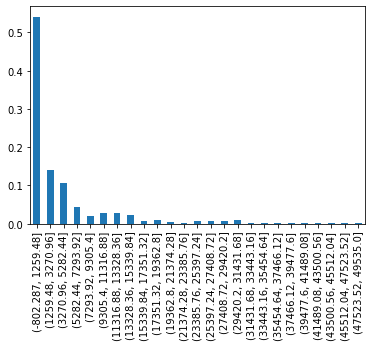

In [109]:
binned_probabilities_real.plot(kind='bar')

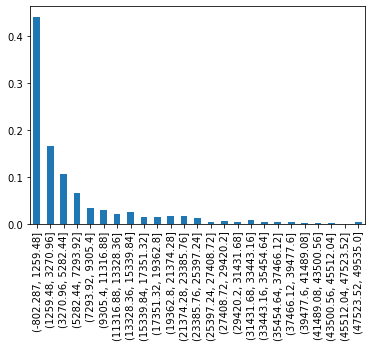

In [110]:
binned_probs_fake.plot(kind='bar')

In [119]:
stats.entropy(binned_probabilities_real.values, binned_probs_fake.values)

inf

In [118]:
from scipy.spatial.distance import jensenshannon
jensenshannon(binned_probabilities_real.values, binned_probs_fake.values)

0.12012642869928797

In [159]:
def jensenshannon_distance(colname, real_col, fake_col, bins=10):
    binned_values_real, bins = pd.cut(real_col, bins=bins, retbins=True)
    binned_probs_real = binned_values_real.value_counts(normalize=True, sort=False)
    binned_probs_fake = pd.cut(fake_col, bins=bins).value_counts(normalize=True, sort=False)
    return {'col_name': colname, 'js_distance': jensenshannon(binned_probs_real, binned_probs_fake)}


In [160]:
jensenshannon_distance('trans_amount', real.trans_amount, fake.trans_amount)

{'col_name': 'trans_amount', 'js_distance': 0.08913046654586265}

In [169]:
from joblib import Parallel, delayed
from typing import List, Dict, Any

def js_distance_df(real: pd.DataFrame, fake: pd.DataFrame, numerical_columns: List) -> List[Dict[str, Any]]:
    assert real.columns.tolist() == fake.columns.tolist(), f'Colums are not identical between `real` and `fake`. '
    real_iter = real[numerical_columns].iteritems()
    fake_iter = fake[numerical_columns].iteritems()
    distances = Parallel(n_jobs=-1)(
        delayed(jensenshannon_distance)
        (colname, real_col, fake_col) for (colname, real_col), (_, fake_col) in zip(real_iter, fake_iter))

    distances_df = pd.DataFrame(distances)
    distances_df = distances_df.append({'col_name': 'mean', 'js_distance': distances_df.js_distance.mean()}, ignore_index=True)
    return distances_df.set_index('col_name')

In [178]:
js_df = js_distance_df(real, fake, numerical_columns=['trans_amount', 'balance_after_trans'])
js_df

,js_distance
col_name,
trans_amount,0.089130
balance_after_trans,0.081193
mean,0.085162


In [116]:
from scipy.stats import ks_2samp

In [218]:
pd.DataFrame.from_dict({'a': [2], 'b':[3]}).T

,0
a,2
b,3


In [117]:
statistics, p_value = ks_2samp(real.trans_amount, fake.trans_amount)

Ks_2sampResult(statistic=0.178, pvalue=2.435958470075192e-14)

In [199]:
from IPython.core.display import display, Markdown

In [206]:
class EvaluationResult(object):
    def __init__(self, name, content, prefix=None, appendix=None, notebook=False):
        self.name = name
        self.prefix = prefix
        self.content = content
        self.appendix = appendix
        self.notebook = notebook

    def show(self):
        if self.notebook:
            output = widgets.Output()
            with output:
                display(Markdown(f'## {self.name}'))
                if self.prefix: display(Markdown(self.prefix))
                display(self.content)
                if self.appendix: display(Markdown(self.appendix))
            display(output)

In [207]:
import ipywidgets as widgets

In [212]:
er = EvaluationResult('Jensen-Shannon distance', js_df, notebook=True, appendix=f' Mean: {js_df.js_distance.mean(): .3f}')

In [213]:
er.show()

Output()

In [215]:
print(str(js_df))

                     js_distance
col_name                        
trans_amount            0.089130
balance_after_trans     0.081193
mean                    0.085162
